In [174]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [169]:
# Read coverage per base file and add column names to the file
header = ["ref", "start", "end", "feature", "base", "coverage"]
df = pd.read_csv("/home/ugdg/workspace/coverage_HGUV/31307_HGUV_testing.pbcov",
                 sep="\t", names=header)
df.coverage.max()

53

### Plotting per exon

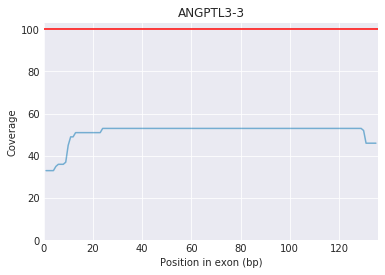

In [170]:
df_feature=df[df['feature']=="ANGPTL3-3"]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_feature['base'], df_feature['coverage'], alpha=0.5)
# Plot limits
ax1.set_ylim(0, df_feature['coverage'].max() + 50)
ax1.set_xlim(0, df_feature['base'].max() + 1)
ax1.hlines(y=100, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[1], color='r')
plt.title("ANGPTL3-3")
ax1.set_xlabel('Position in exon (bp)')
ax1.set_ylabel('Coverage')
plt.show()

### Plotting whole gene

In [171]:
# Create a copy of the dataframe so I dont make changes to the original dataframe
ab = df.copy()
ab['index'] = ab.index
ab.head()

,ref,start,end,feature,base,coverage,index
0,1,63063147,63063742,ANGPTL3-1,1,0,0
1,1,63063147,63063742,ANGPTL3-1,2,0,1
2,1,63063147,63063742,ANGPTL3-1,3,0,2
3,1,63063147,63063742,ANGPTL3-1,4,0,3
4,1,63063147,63063742,ANGPTL3-1,5,0,4


In [172]:
# Testing getting the possition to the index
index_positions = []
for exon in list(ab.feature.unique()):
    index_positions.append(ab[ab['feature']==exon].iloc[0]["index"])
print(index_positions)

[0, 595, 726, 861, 995, 1111, 1398]


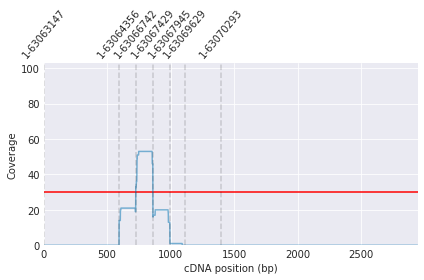

In [173]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ab['index'], ab['coverage'], alpha=0.5)
# Plot limits
ax1.set_ylim(0, ab['coverage'].max() + 50)
ax1.set_xlim(0, ab['index'].max() + 1)
ax1.hlines(y=30, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r')

# Getting positions to plot vertical lines separating exons
index_positions = []
names = []
for exon in list(ab.feature.unique()):
    index_positions.append(ab[ab['feature']==exon].iloc[0]["index"])
    names.append(str(ab[ab['feature']==exon].iloc[0]["ref"]) + "-" + 
                 str(ab[ab['feature']==exon].iloc[0]["start"]))

# Set limits for the vertical lines, it is a plot on top of a plot
ax2 = ax1.twiny()
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlim(ax1.get_xlim())

# Paint vertical lines, we use [1:] because the first point is always zero
ax2.vlines(x=index_positions, ymin=0, ymax=ax2.get_ylim()[1], linestyle='--', 
           alpha=0.15)
ax2.grid(b=False)
ax2.set_xticks(index_positions)
ax2.set_xticklabels(names, rotation=50, minor=False)

ax1.set_xlabel('cDNA position (bp)')
ax1.set_ylabel('Coverage')

fig.tight_layout()
figname = "ANGPTL3_pbcov.png"
fig.savefig(os.path.join("/home/ugdg/workspace/coverage_HGUV/", figname))
plt.show()
plt.close(fig)

## Do it for all the genes

In [188]:
# Read coverage per base file and add column names to the file
header = ["chr", "start", "end", "feature", "base", "31278", "31282", "31290", 
          "31292", "31299", "31305", "31307", "31316", "31318", "31279", "31284", 
          "31291", "31298", "31300", "31306", "31315", "31317"]
df = pd.read_csv("/home/ugdg/workspace/coverage_HGUV/pasted_pbcov.tsv", sep="\t")
df.head()

,chr,start,end,feature,base,31278,31282,31290,31292,31299,...,31316,31318,31279,31284,31291,31298,31300,31306,31315,31317
0,1,63063147,63063742,ANGPTL3-1,1,33,25,30,24,25,...,26,18,25,30,39,34,30,41,27,32
1,1,63063147,63063742,ANGPTL3-1,2,35,25,31,24,25,...,27,19,25,30,42,35,31,41,28,33
2,1,63063147,63063742,ANGPTL3-1,3,35,25,31,24,25,...,27,19,25,30,42,35,31,41,28,33
3,1,63063147,63063742,ANGPTL3-1,4,35,24,31,24,25,...,27,19,25,30,41,35,31,40,28,33
4,1,63063147,63063742,ANGPTL3-1,5,35,24,31,24,25,...,27,19,25,30,41,35,31,40,28,33


In [189]:
df["mean"] = df.loc[:, ["31278", "31282", "31290", "31292", "31299", "31305", 
                        "31307", "31316", "31318", "31279", "31284", "31291", 
                        "31298", "31300", "31306", "31315", "31317"]].mean(axis=1)

gene_list = []
for gene in list(df["feature"]):
    gene_list.append(gene.split("-")[0])
    
df["gene"] = gene_list
df.head()

,chr,start,end,feature,base,31278,31282,31290,31292,31299,...,31279,31284,31291,31298,31300,31306,31315,31317,mean,gene
0,1,63063147,63063742,ANGPTL3-1,1,33,25,30,24,25,...,25,30,39,34,30,41,27,32,29.823529,ANGPTL3
1,1,63063147,63063742,ANGPTL3-1,2,35,25,31,24,25,...,25,30,42,35,31,41,28,33,30.529412,ANGPTL3
2,1,63063147,63063742,ANGPTL3-1,3,35,25,31,24,25,...,25,30,42,35,31,41,28,33,30.529412,ANGPTL3
3,1,63063147,63063742,ANGPTL3-1,4,35,24,31,24,25,...,25,30,41,35,31,40,28,33,30.352941,ANGPTL3
4,1,63063147,63063742,ANGPTL3-1,5,35,24,31,24,25,...,25,30,41,35,31,40,28,33,30.352941,ANGPTL3


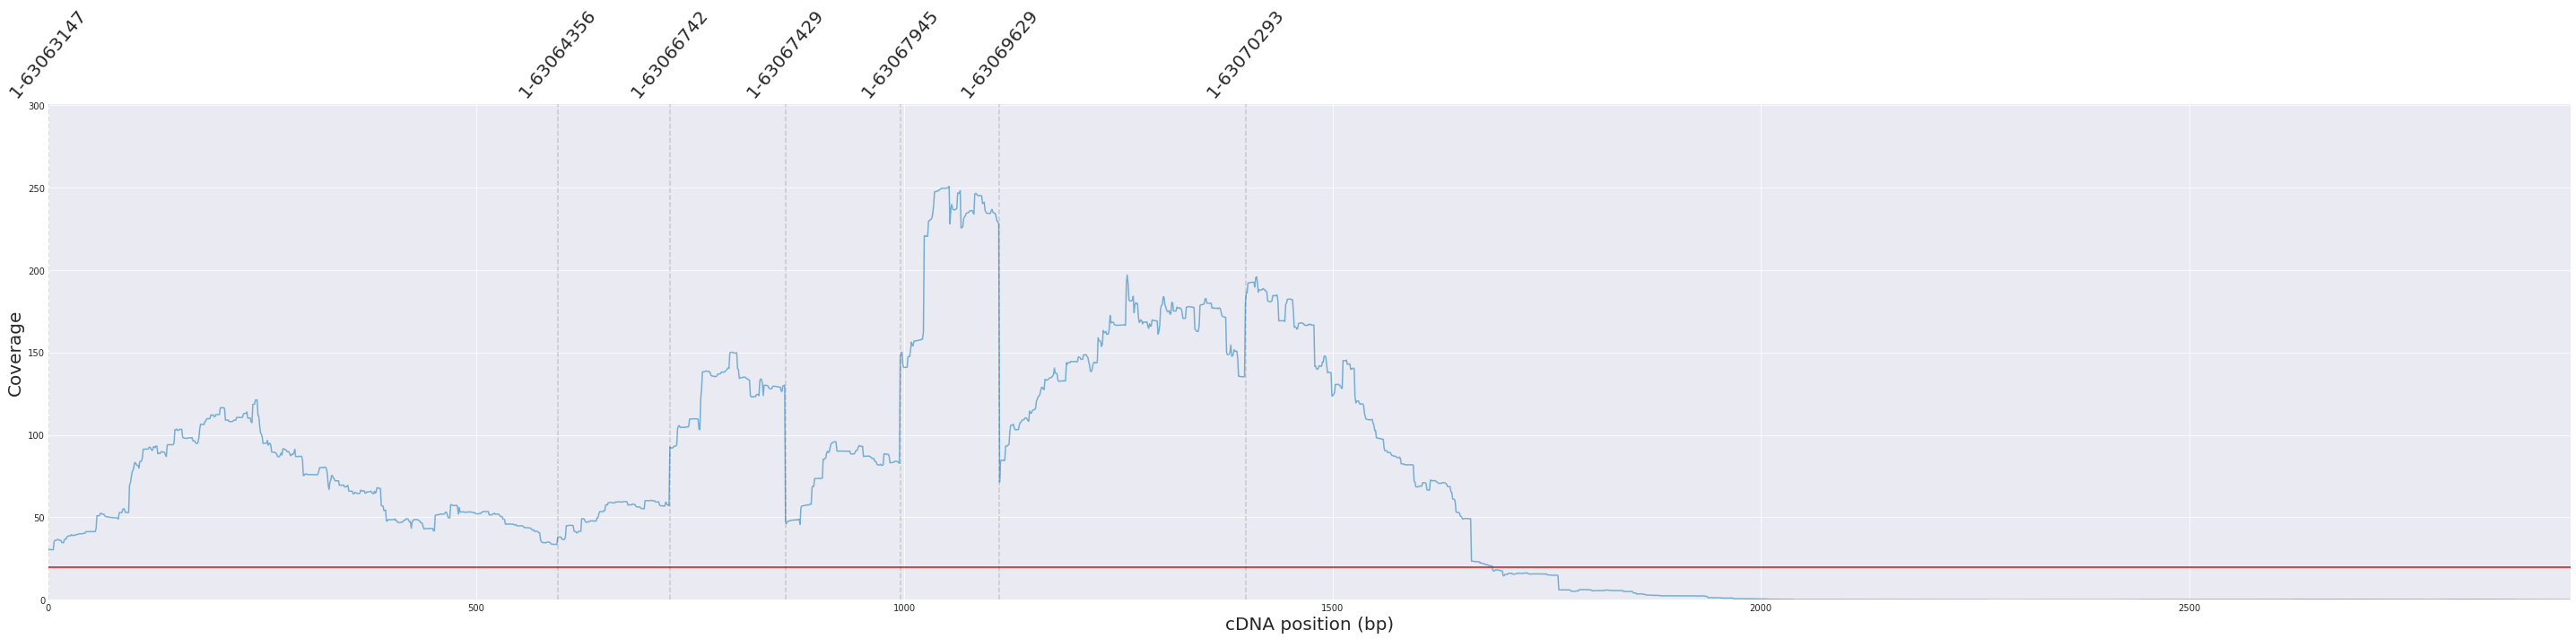

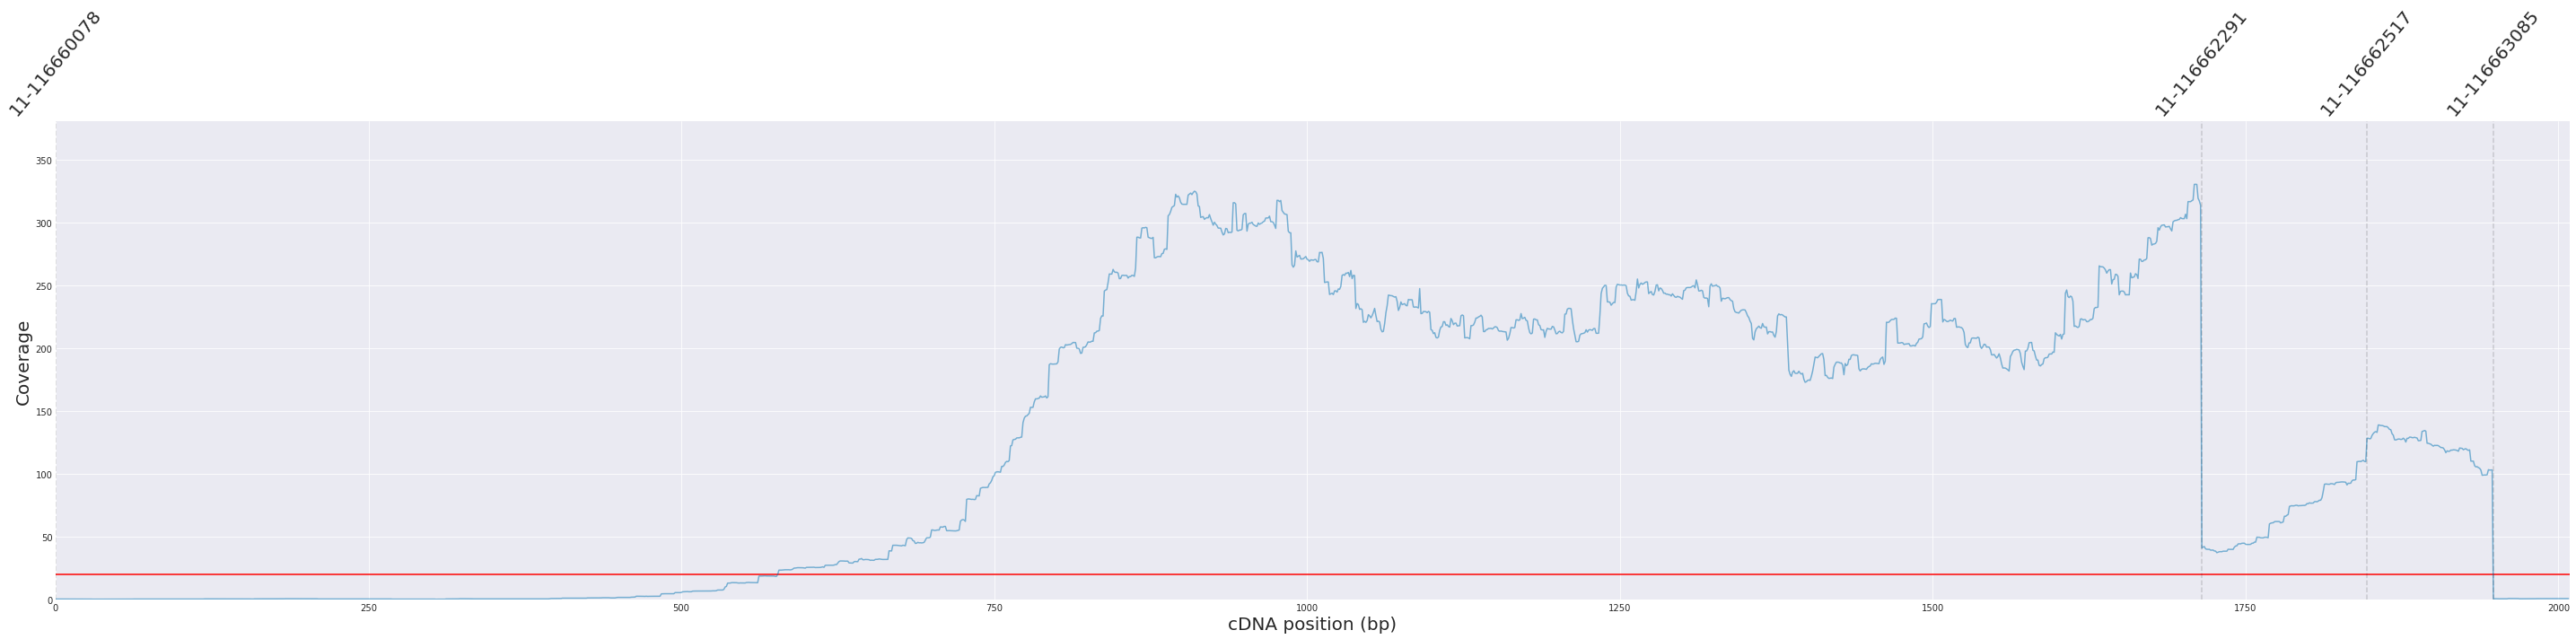

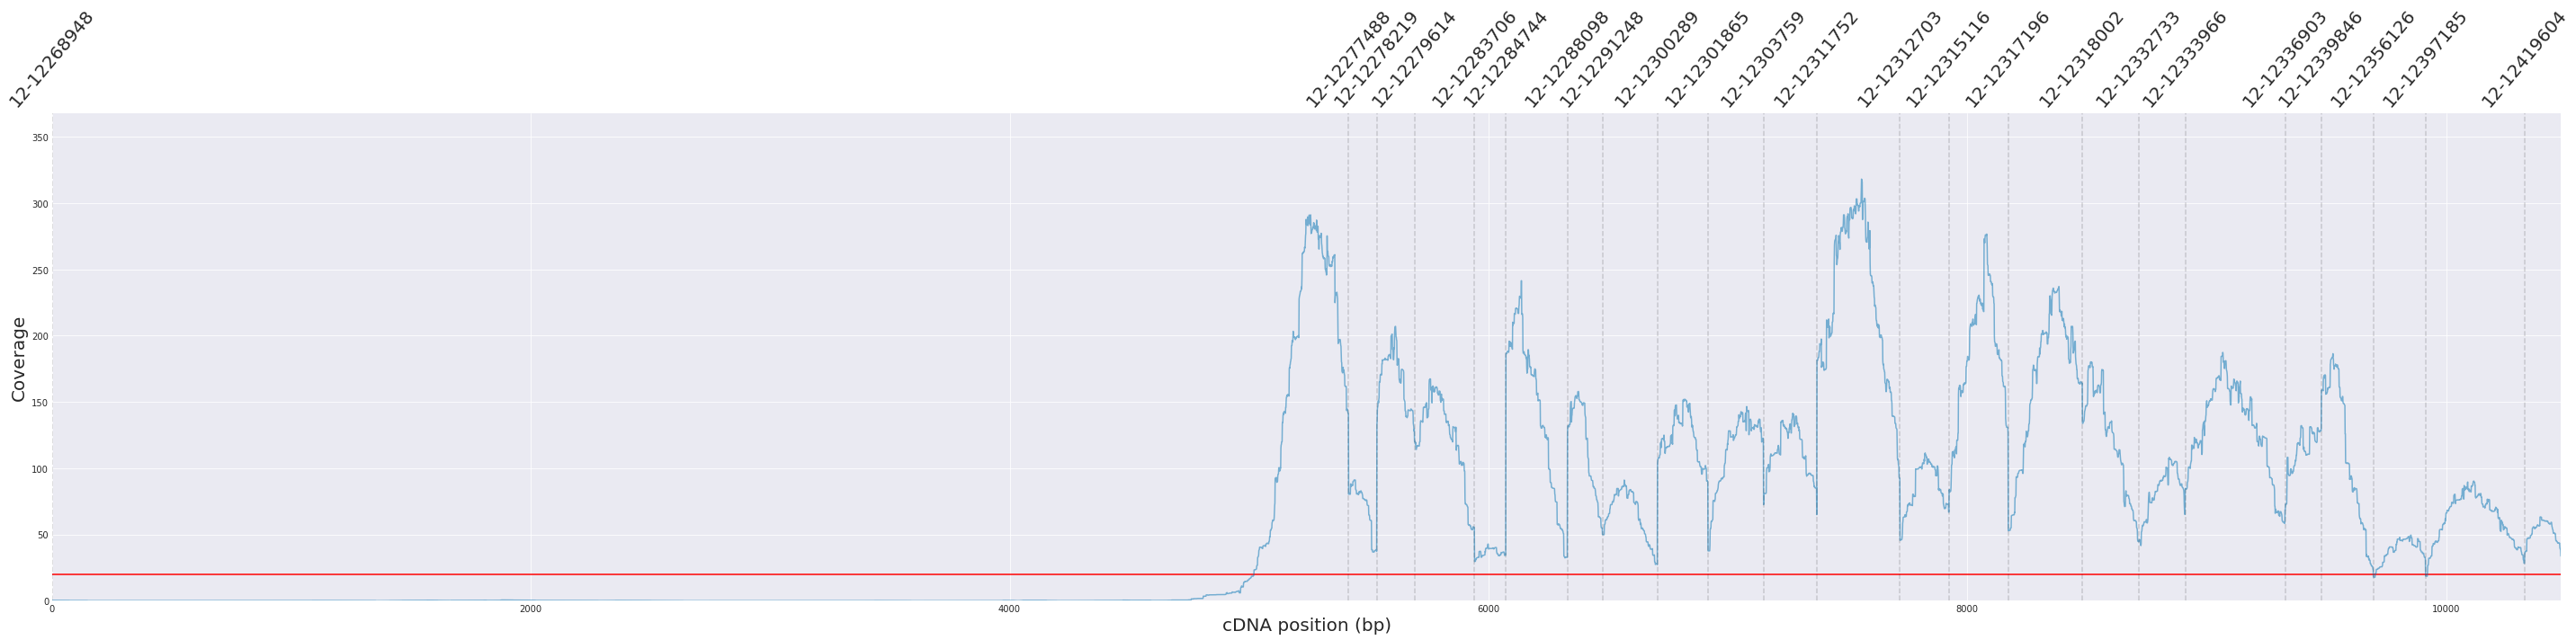

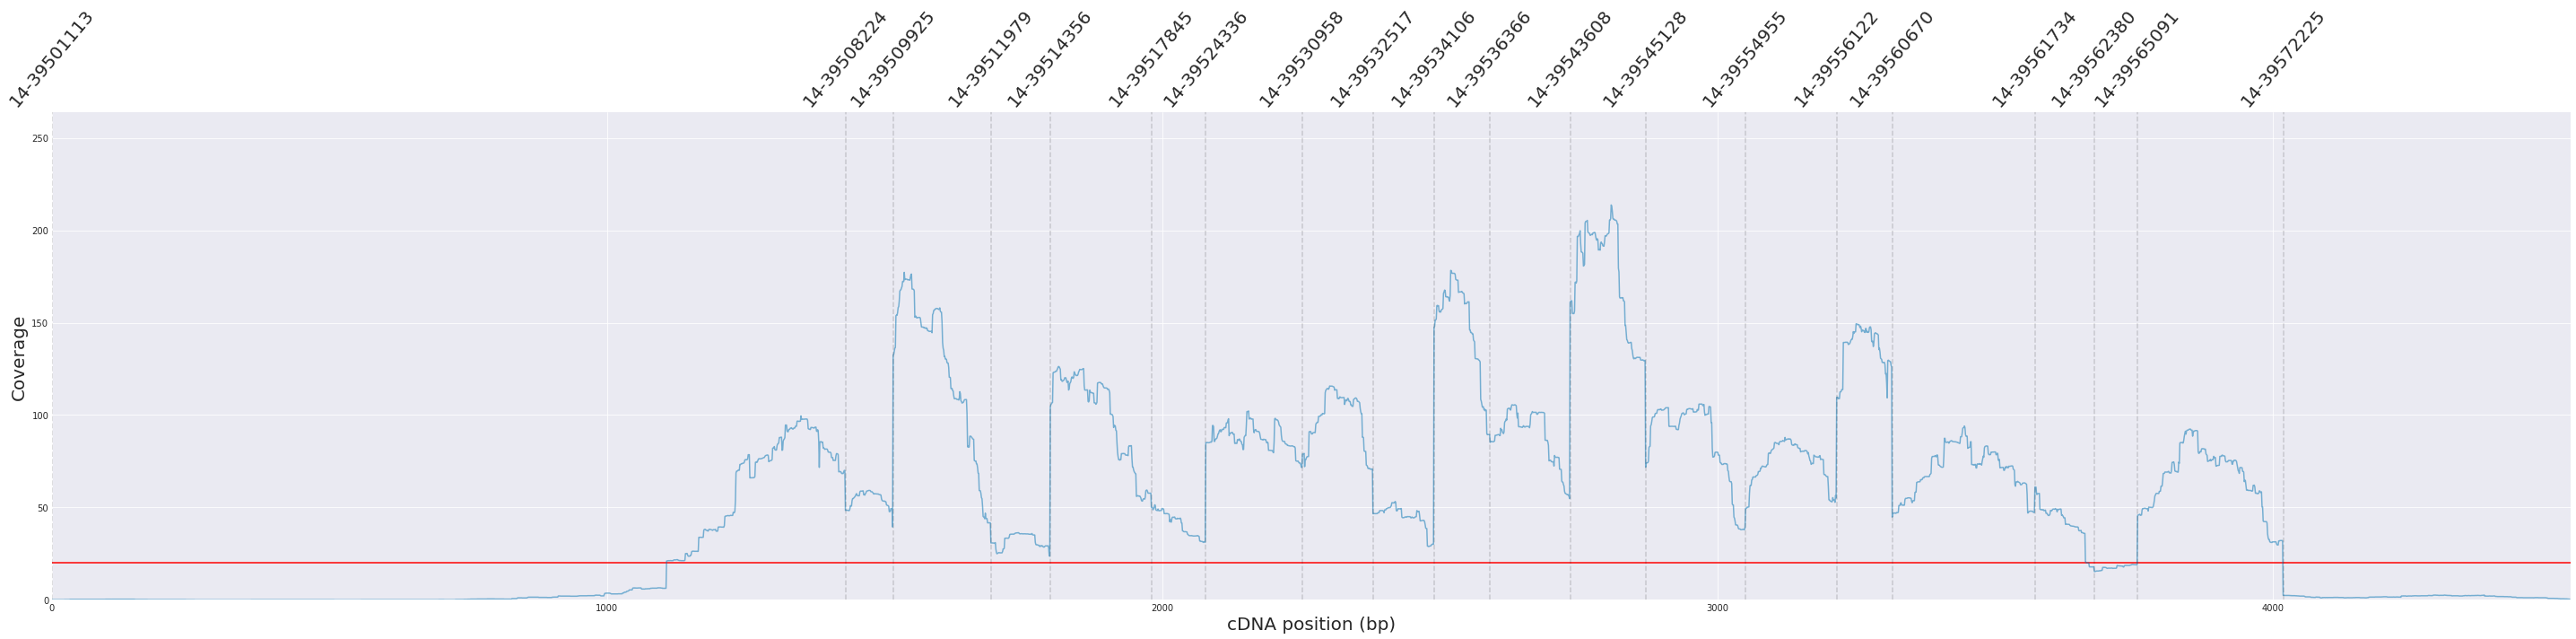

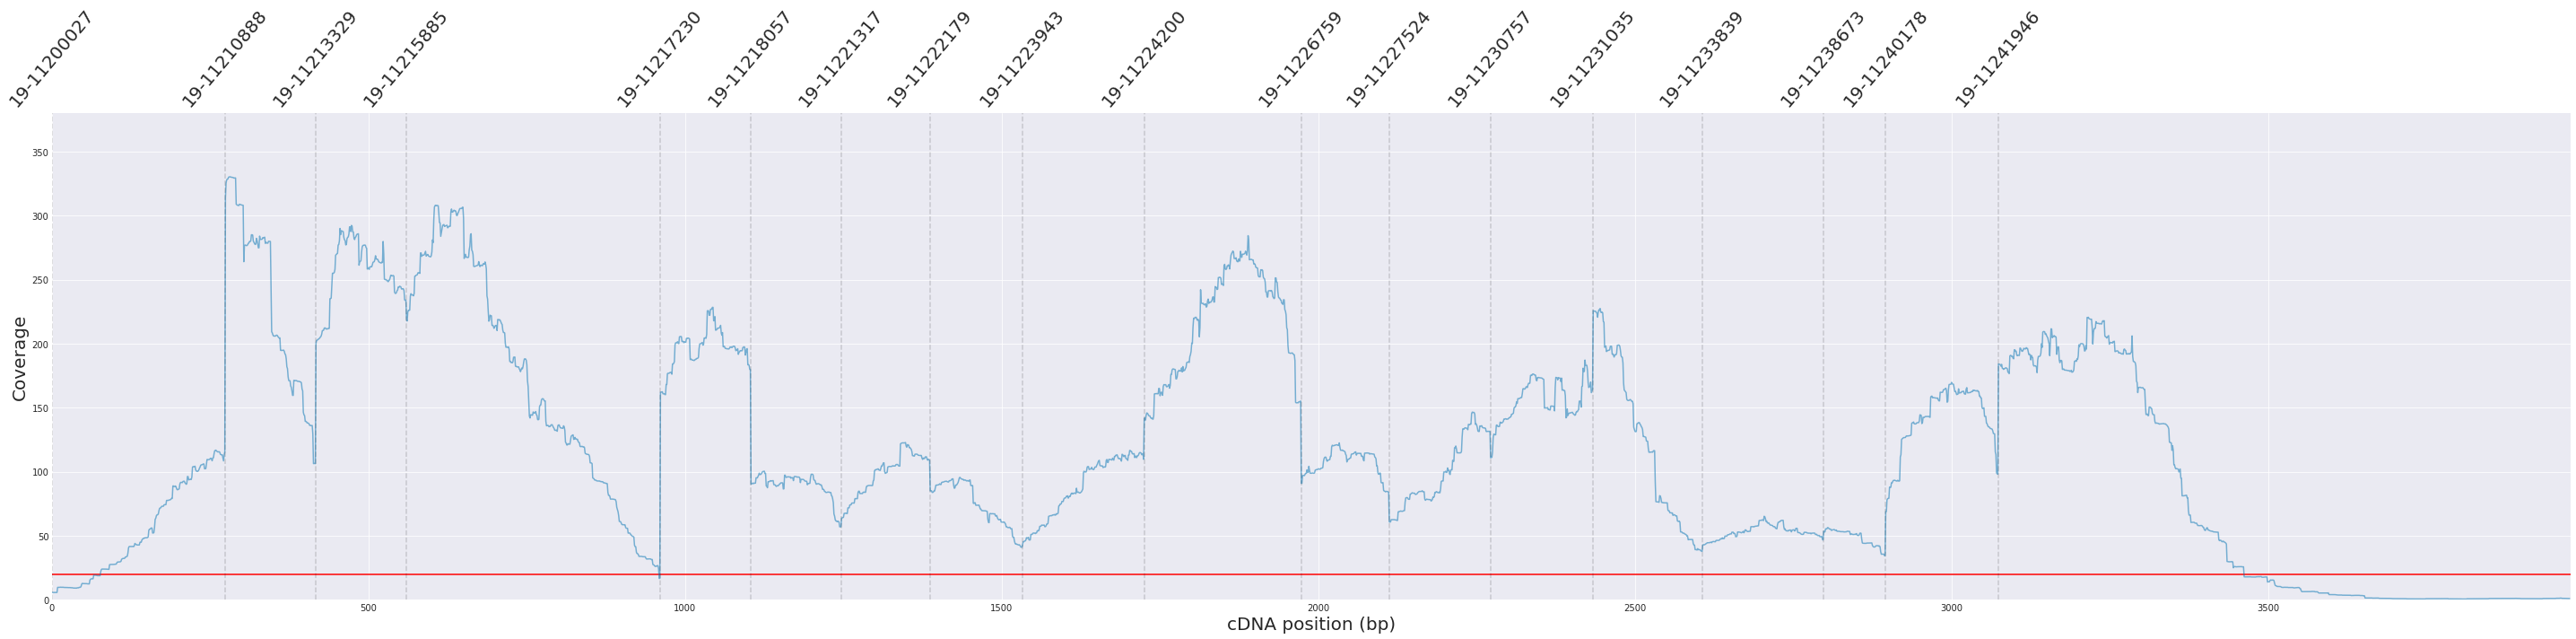

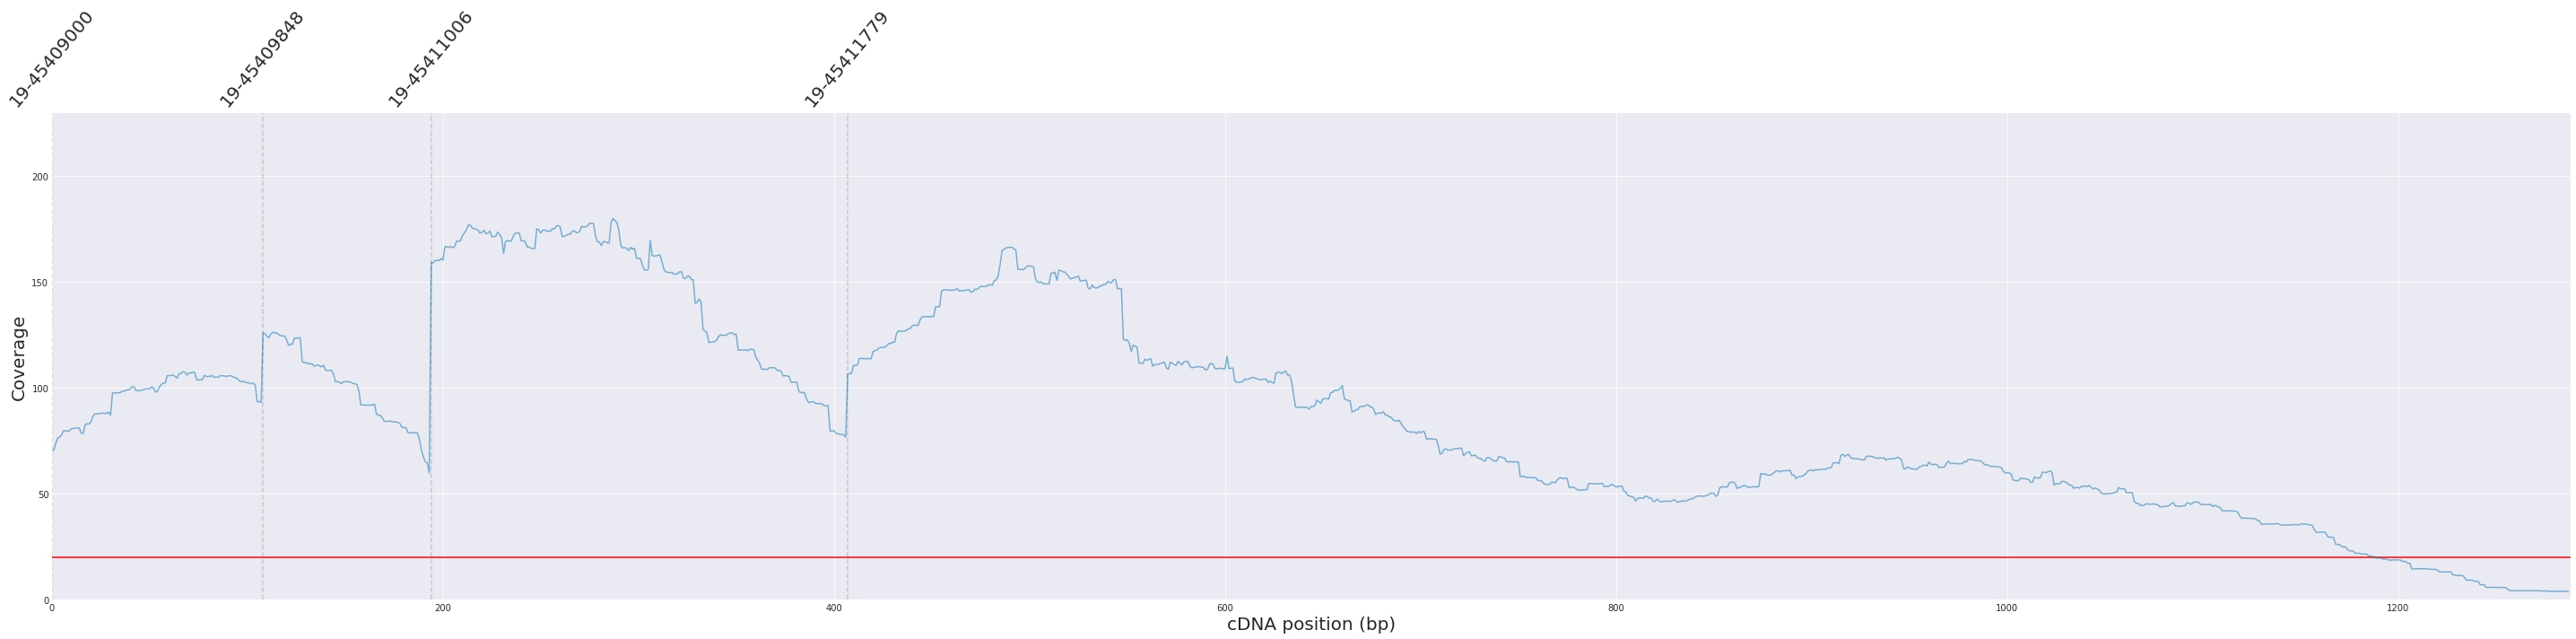

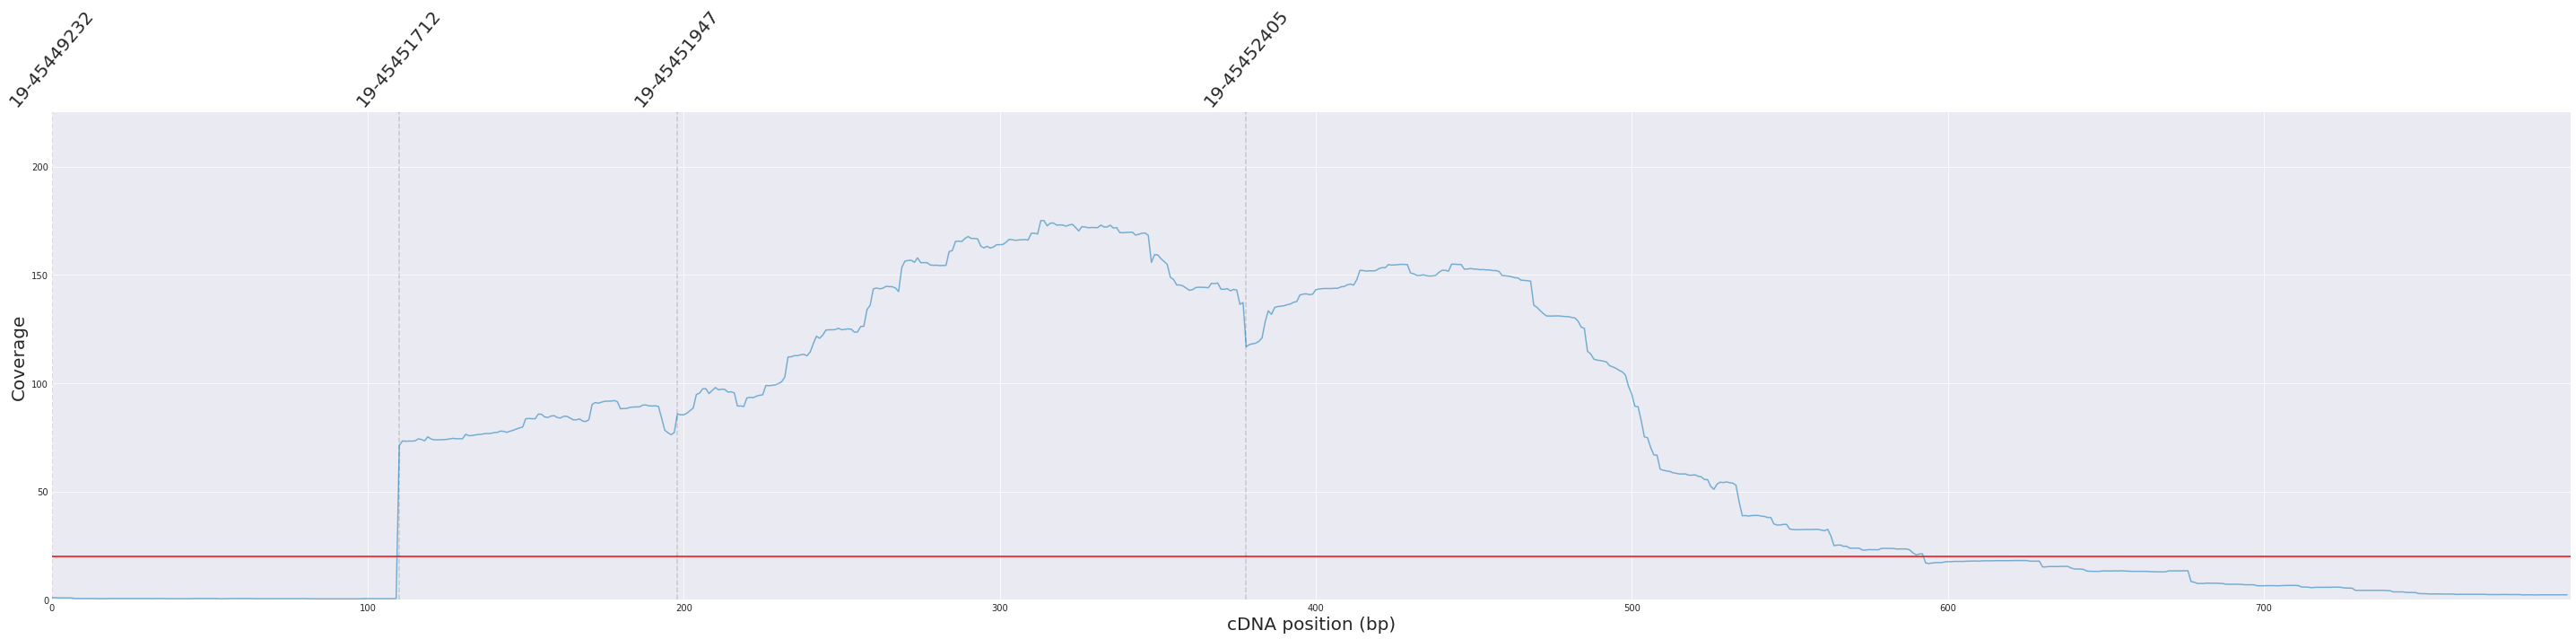

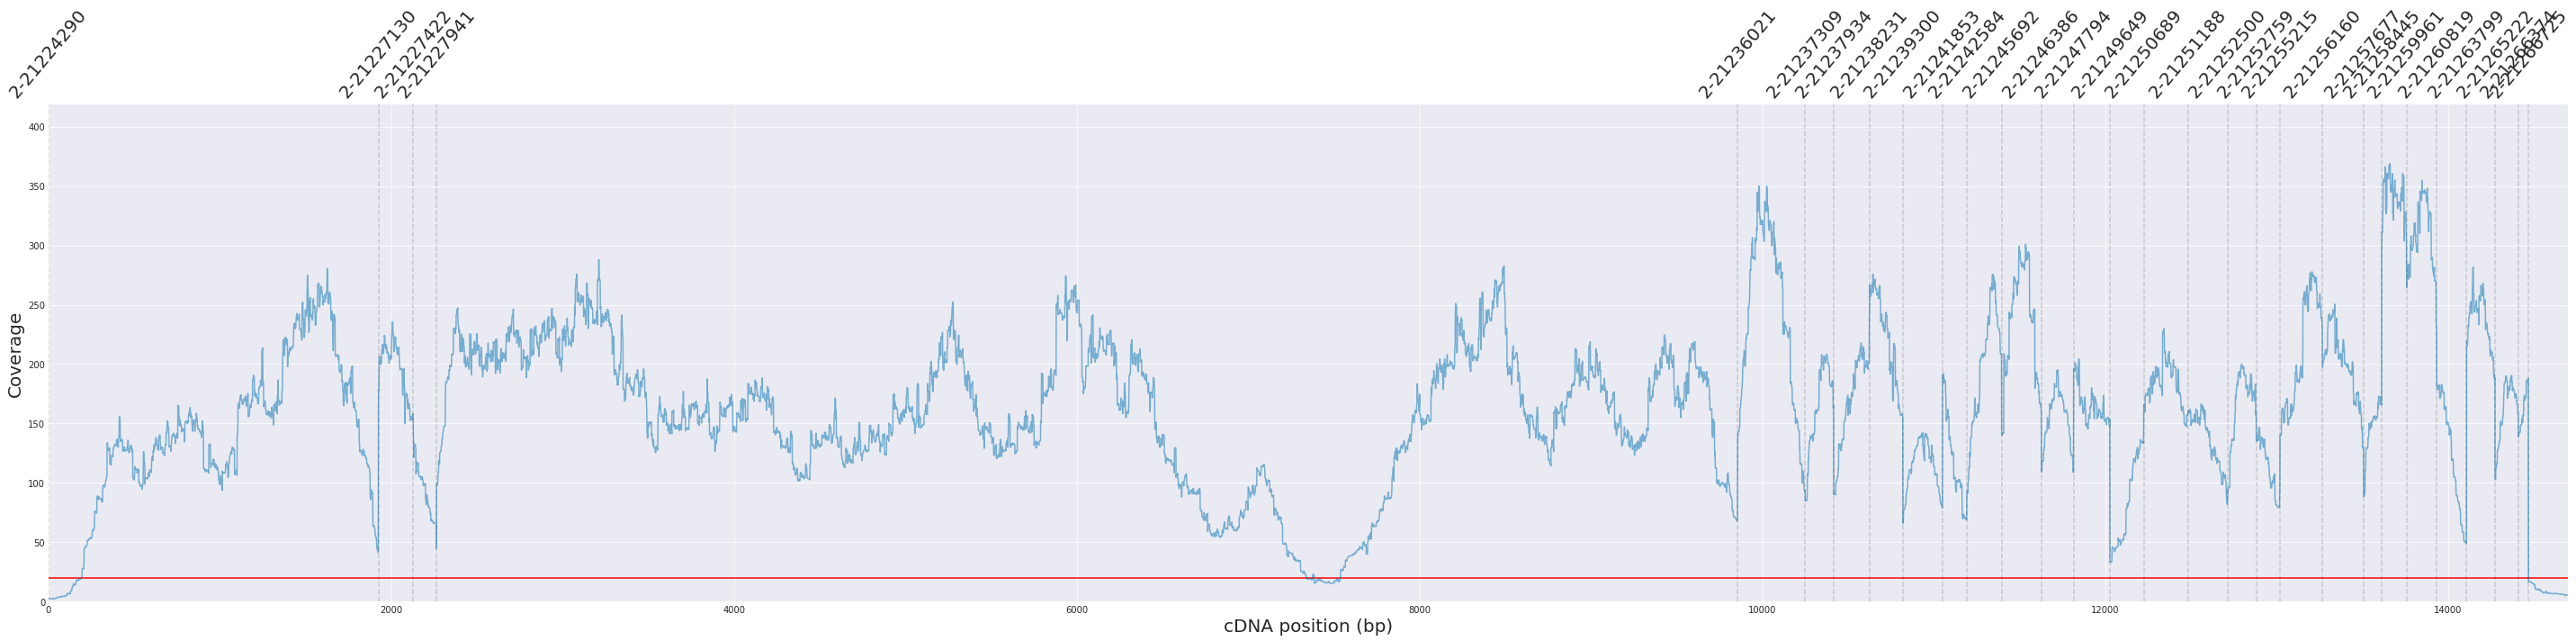

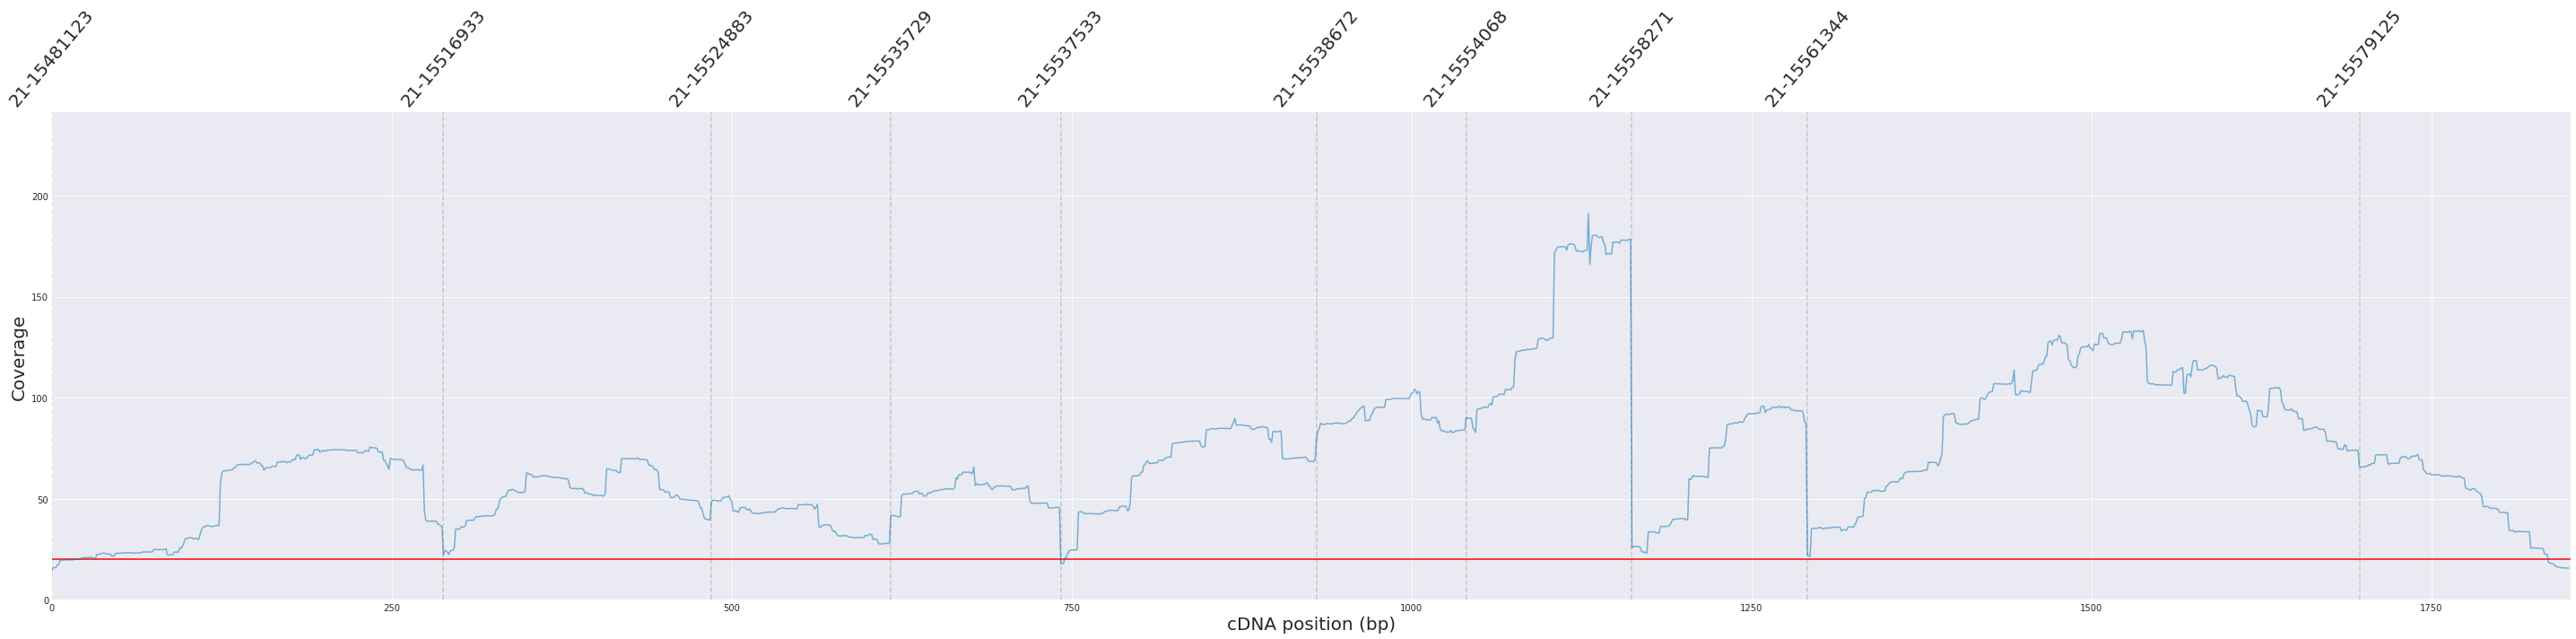

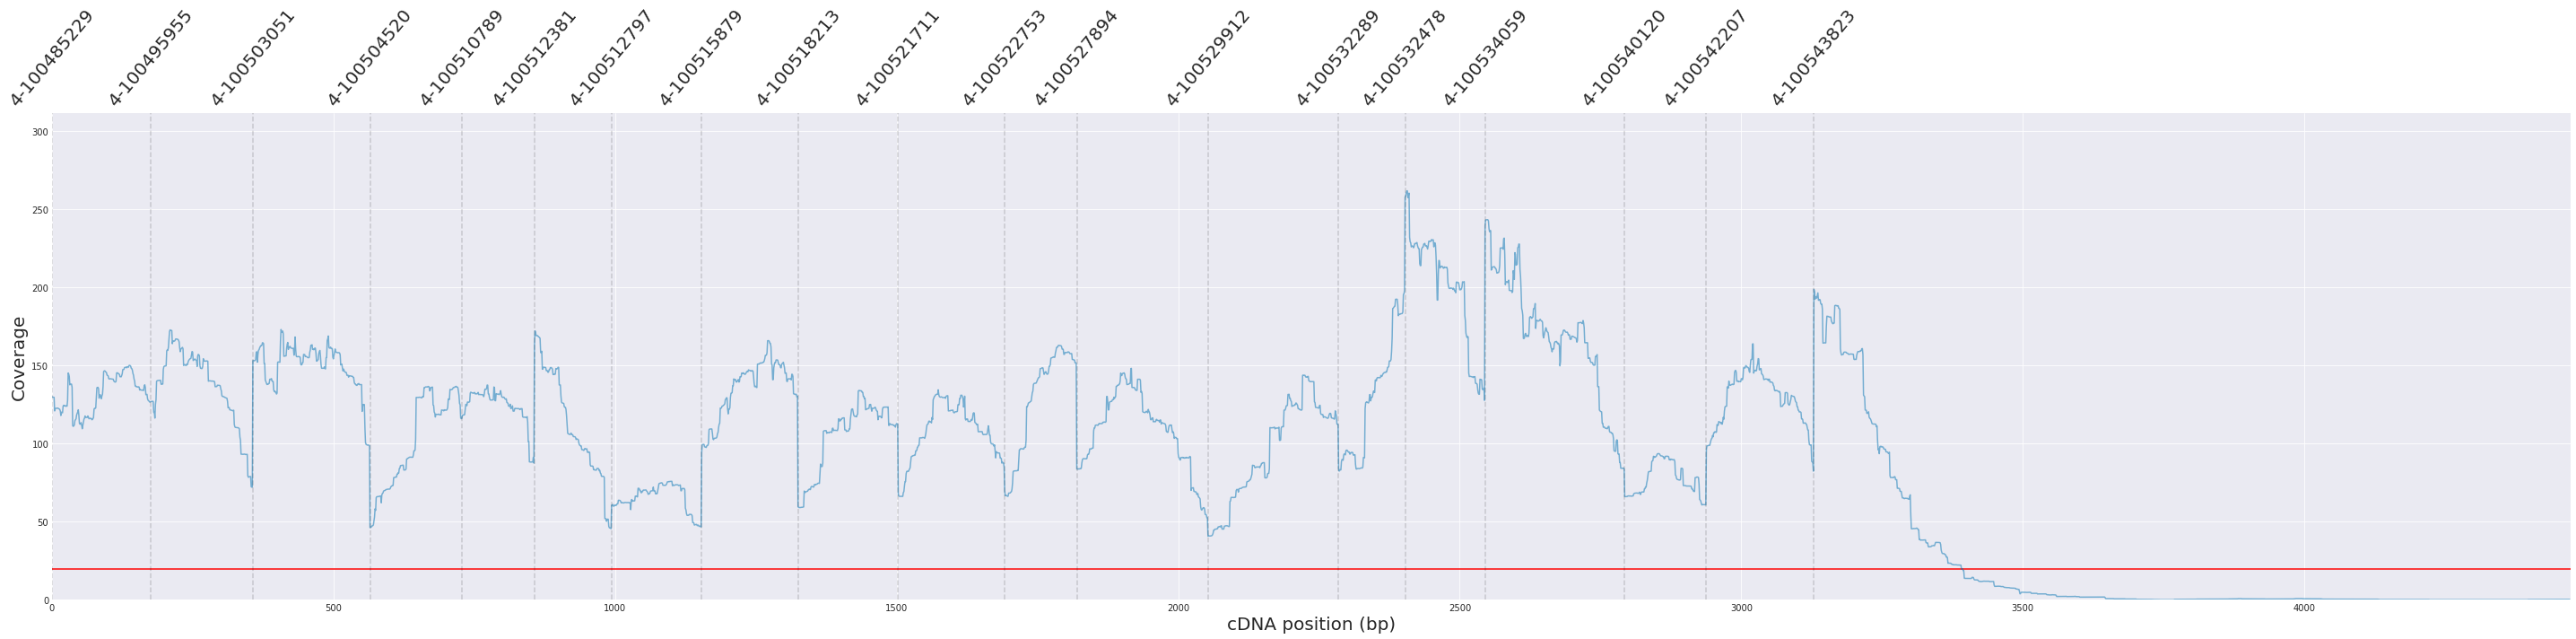

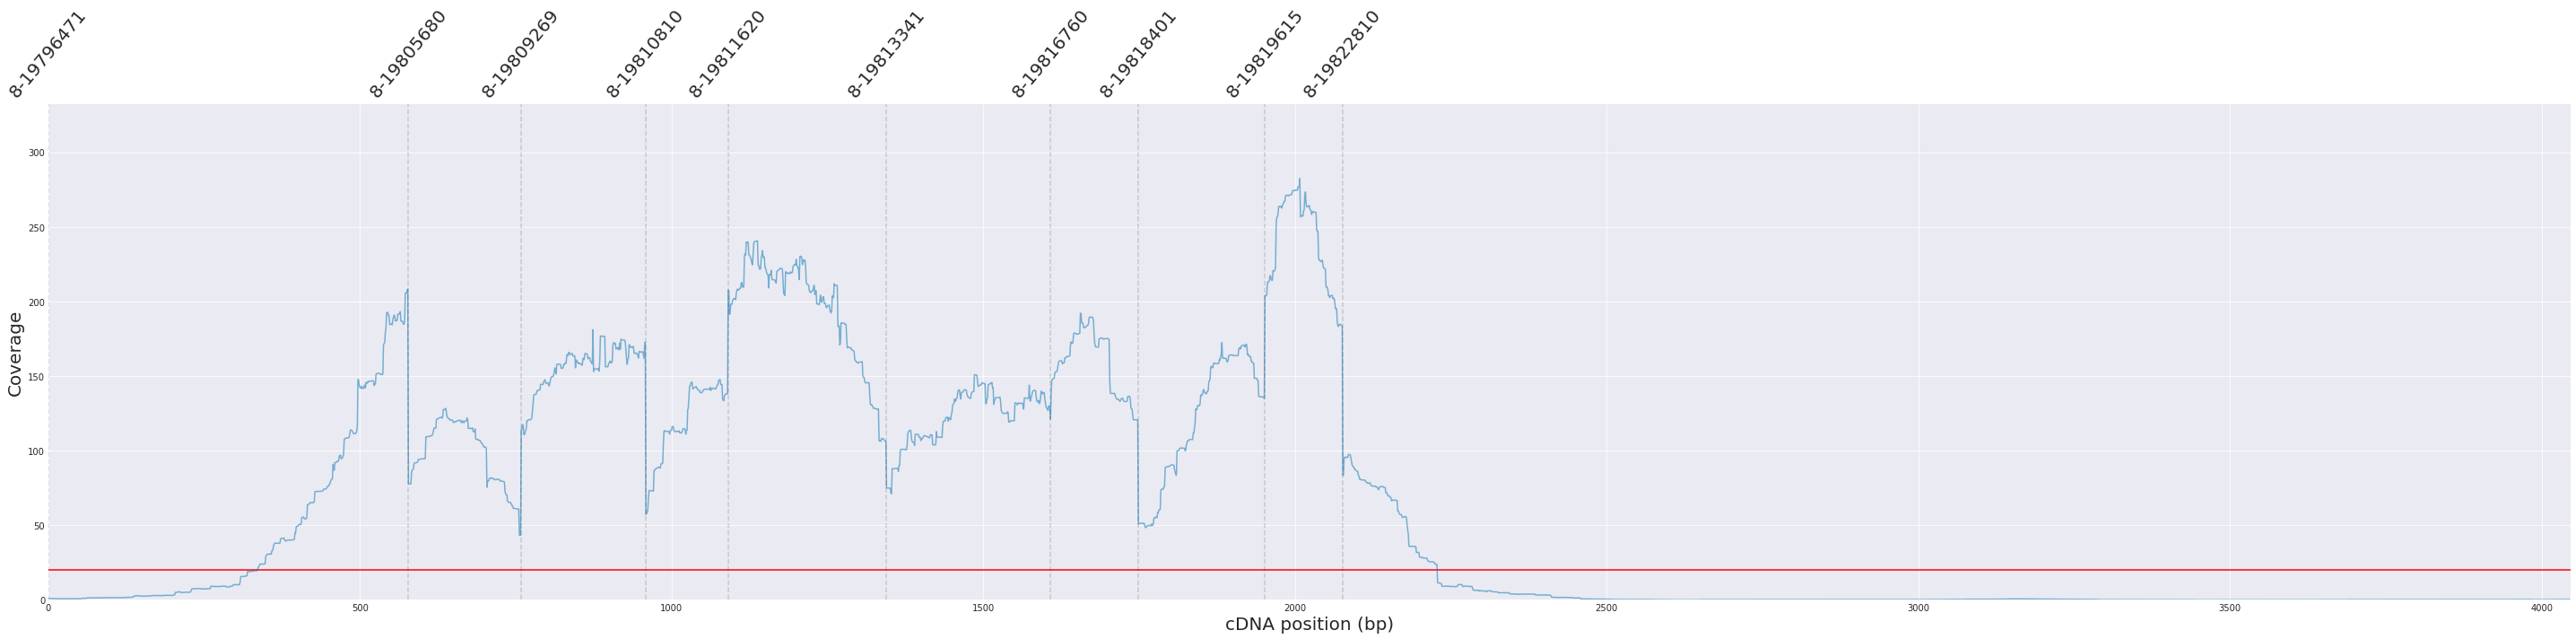

In [214]:
# Create a copy of the dataframe so I dont make changes to the original dataframe
ab = df.copy()

# Create a dataframe per gene
for gene in list(ab.gene.unique()):
    dfg = ab.loc[ab['gene'].map(str) == gene].reset_index(drop=True)
    dfg["index"] = dfg.index

    # Create a plot per gene
    fig = plt.figure(figsize=(40,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(dfg['index'], dfg['mean'], alpha=0.5)
    # Plot limits
    ax1.set_ylim(0, dfg['mean'].max() + 50)
    ax1.set_xlim(0, dfg['index'].max() + 1)
    ax1.hlines(y=20, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r')

    # Getting positions to plot vertical lines separating exons
    index_positions = []
    names = []
    for exon in list(dfg.feature.unique()):
        index_positions.append(dfg[dfg['feature']==exon].iloc[0]["index"])
        names.append(str(dfg[dfg['feature']==exon].iloc[0]["chr"]) + "-" + 
                     str(dfg[dfg['feature']==exon].iloc[0]["start"]))

    # Set limits for the vertical lines, it is a plot on top of a plot
    ax2 = ax1.twiny()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
    ax2.vlines(x=index_positions, ymin=0, ymax=ax2.get_ylim()[1], linestyle='--', 
               alpha=0.15)
    ax2.grid(b=False)
    ax2.set_xticks(index_positions)
    ax2.set_xticklabels(names, rotation=50, minor=False, fontsize=20)

    ax1.set_xlabel('cDNA position (bp)', fontsize=20)
    ax1.set_ylabel('Coverage', fontsize=20)

    fig.tight_layout()
    figname = "{}_pbcov.png".format(gene)
    fig.savefig(os.path.join("/home/ugdg/workspace/coverage_HGUV/", figname))
    plt.show()
    plt.close(fig)
 